In [247]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [372]:
data = pd.read_csv('Desktop/athlete_events.csv')
regions = pd.read_csv('Desktop/noc_regions.csv')

In [373]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [374]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [375]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [376]:
print('Rows: ', data.shape[0])
print('Columns: ', data.shape[1])

Rows:  271116
Columns:  15


In [377]:
print(data.dtypes)

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [378]:
missing_values_count = data.isnull().sum()
missing_values_count

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [379]:
missing_values_count = data.isnull().sum()
total_missing_values = missing_values_count.sum()
total_cells = np.product(data.shape)
Percentage_of_missing_data = (total_missing_values/total_cells) * 100
print("Percentage of missing data is",Percentage_of_missing_data)

Percentage of missing data is 8.947043577902694


EXPLORATORY DATA ANALYSIS AND DATA CLEANING

In [380]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [381]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [382]:
merged.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [383]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [384]:
#we found out how many teams in our data
print("Team Names in Dataset:")
print(data.Team.unique())

print("\nSport Types:")
print(data.Sport.unique())

Team Names in Dataset:
['China' 'Denmark' 'Denmark/Sweden' ... 'Solos Carex' 'Dow Jones' 'Digby']

Sport Types:
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [385]:
print('Number of female participants at the Games: ',len(data[data.Sex=='F']))
print('Number of male participants at the Games: ',len(data[data.Sex=='M']))

Number of female participants at the Games:  74522
Number of male participants at the Games:  196594


ALWAYS FUN TO KNOW OUR OUTLIERS!

In [388]:
r = data.loc[data['Age'].idxmax()]
print('Name: ', r.Name, '\nAge: ', r.Age,'years!','\nYear: ', r.Year, '\nSport: ', r.Sport)
print()
s = data.loc[data['Age'].idxmin()]
print('Name: ', s.Name, '\nAge:' , s.Age,'years!','\nYear: ', s.Year, '\nSport: ', s.Sport)

Name:  John Quincy Adams Ward 
Age:  97.0 years! 
Year:  1928 
Sport:  Art Competitions

Name:  Dimitrios Loundras 
Age: 10.0 years! 
Year:  1896 
Sport:  Gymnastics


In [389]:
r = data.loc[data['Height'].idxmax()]
print('Name: ', r.Name, '\nHEIGHT: ', r.Height,'cm!','\nYear: ', r.Year, '\nSport: ', r.Sport)
print()
s = data.loc[data['Height'].idxmin()]
print('Name: ', s.Name, '\nHEIGHT:' , s.Height,'cm!','\nYear: ', s.Year, '\nSport: ', s.Sport)

Name:  Yao Ming 
HEIGHT:  226.0 cm! 
Year:  2000 
Sport:  Basketball

Name:  Rosario Briones 
HEIGHT: 127.0 cm! 
Year:  1968 
Sport:  Gymnastics


In [262]:
r = data.loc[data['Weight'].idxmax()]
print('Name: ', r.Name, '\nWEIGHT: ', r.Weight,'kg!','\nYear: ', r.Year, '\nSport: ', r.Sport, '\nAge: ', r.Age)
print()
s = data.loc[data['Weight'].idxmin()]
print('Name: ', s.Name, '\nWEIGHT: ', s.Weight,'kg!','\nYear: ', s.Year, '\nSport: ', s.Sport, r.Age,'\nAge: ', s.Age)

Name:  Ricardo Blas, Jr. 
WEIGHT:  214.0 kg! 
Year:  2008 
Sport:  Judo 
Age:  21.0

Name:  Choi Myong-Hui 
WEIGHT:  25.0 kg! 
Year:  1980 
Sport:  Gymnastics 21.0 
Age:  14.0


In [263]:
data.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

DATA CLEANING

In [264]:
datac = pd.read_csv('Desktop/athlete_events.csv')
regionsc = pd.read_csv('Desktop/noc_regions.csv')

FILLING ALL NAN VALUES IN NUMERIC COLUMNS WITH ZEROS TO SHOW THE DIFFERENCE DATA CLEANING MAKES

In [265]:
values = {'Age': 0, 'Weight': 0, 'Height': 0}
datac = datac.fillna(value=values)
missing_values_count = datac.isnull().sum()
missing_values_count

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Text(0.5, 1.0, 'Age Distribution of Athletes')

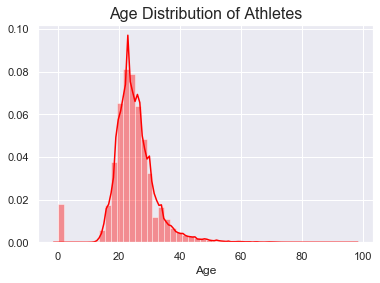

In [266]:
#age distribution
x=sns.distplot(datac['Age'],color='Red',kde=True)#Whether to plot a gaussian kernel density estimate.
#In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable
x.set_title('Age Distribution of Athletes',fontsize=16,fontweight=200)

Text(0.5, 1.0, 'Weight Distribution of Athletes')

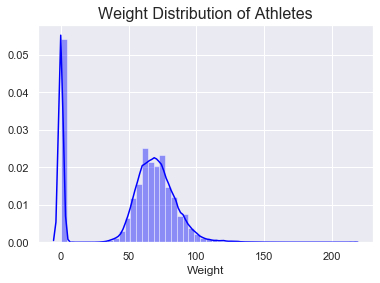

In [267]:
#age distribution
x=sns.distplot(datac['Weight'],color='Blue',kde=True)
x.set_title('Weight Distribution of Athletes',fontsize=16,fontweight=200)

Text(0.5, 1.0, 'Height Distribution of Athletes')

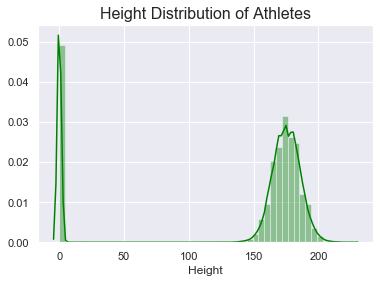

In [268]:
#age distribution
x=sns.distplot(datac['Height'].dropna(),color='Green',kde=True)
x.set_title('Height Distribution of Athletes',fontsize=16,fontweight=200)

DATA CLEANING

In [269]:
data = pd.read_csv('Desktop/athlete_events.csv')
regions = pd.read_csv('Desktop/noc_regions.csv')

In [319]:
data['Weight'].fillna(data.groupby('Sport')['Weight'].transform('mean'), inplace = True)
data['Age'] = data['Age'].fillna(data.groupby('Sport')['Age'].transform('mean'))
data['Height'] = data['Height'].fillna(data.groupby('Sport')['Height'].transform('mean'))
data['Medal'].fillna('DNW', inplace = True)

In [320]:
data["Height"] = data["Height"].fillna(data["Height"].median())
data["Weight"] = data["Weight"].fillna(data["Weight"].median())

In [391]:
data.to_csv("data_clean.csv")

In [321]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Text(0.5, 1.0, 'Age Distribution of Athletes')

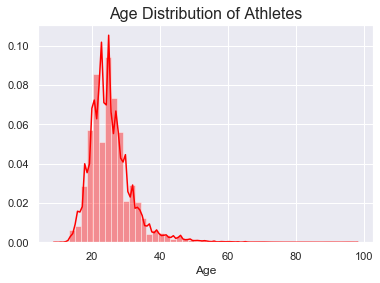

In [273]:
x=sns.distplot(data['Age'],color='Red',kde=True)
x.set_title('Age Distribution of Athletes',fontsize=16,fontweight=200)

Text(0.5, 1.0, 'Weight Distribution of Athletes')

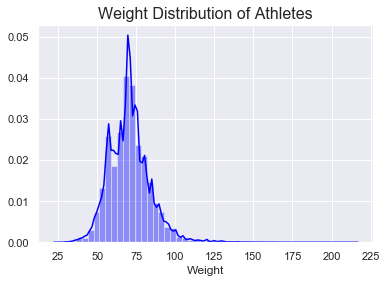

In [274]:
#age distribution
x=sns.distplot(data['Weight'],color='Blue',kde=True)
x.set_title('Weight Distribution of Athletes',fontsize=16,fontweight=200)

Text(0.5, 1.0, 'Height Distribution of Athletes')

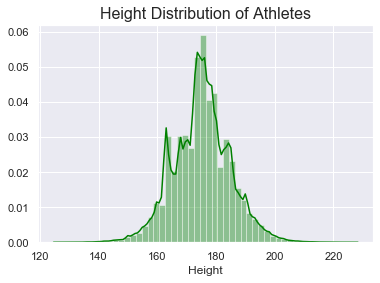

In [275]:
#age distribution
x=sns.distplot(data['Height'].dropna(),color='Green',kde=True)
x.set_title('Height Distribution of Athletes',fontsize=16,fontweight=200)

DATA VISUALIZATION

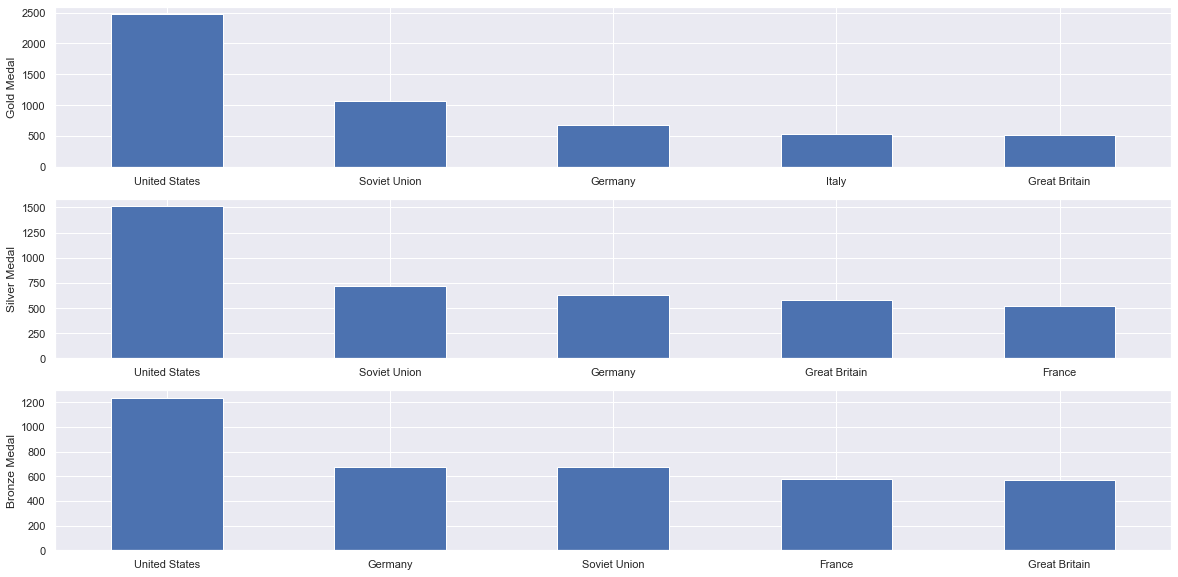

In [276]:
plt.subplot(3,1,1)
gold = data[data.Medal == "Gold"].Team.value_counts().head(5)
gold.plot(kind='bar',rot=0,figsize=(20, 10))
plt.ylabel("Gold Medal")
plt.subplot(3,1,2)
silver = data[data.Medal == "Silver"].Team.value_counts().head(5)
silver.plot(kind='bar',rot=0,figsize=(20, 10))
plt.ylabel("Silver Medal")
plt.subplot(3,1,3)
bronze = data[data.Medal == "Bronze"].Team.value_counts().head(5)
bronze.plot(kind='bar',rot=0,figsize=(20, 10))
plt.ylabel("Bronze Medal")

plt.show()

In [277]:
goldMedals = merged[(merged.Medal == 'Gold')]

In [278]:
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Distribution of Gold Medals')

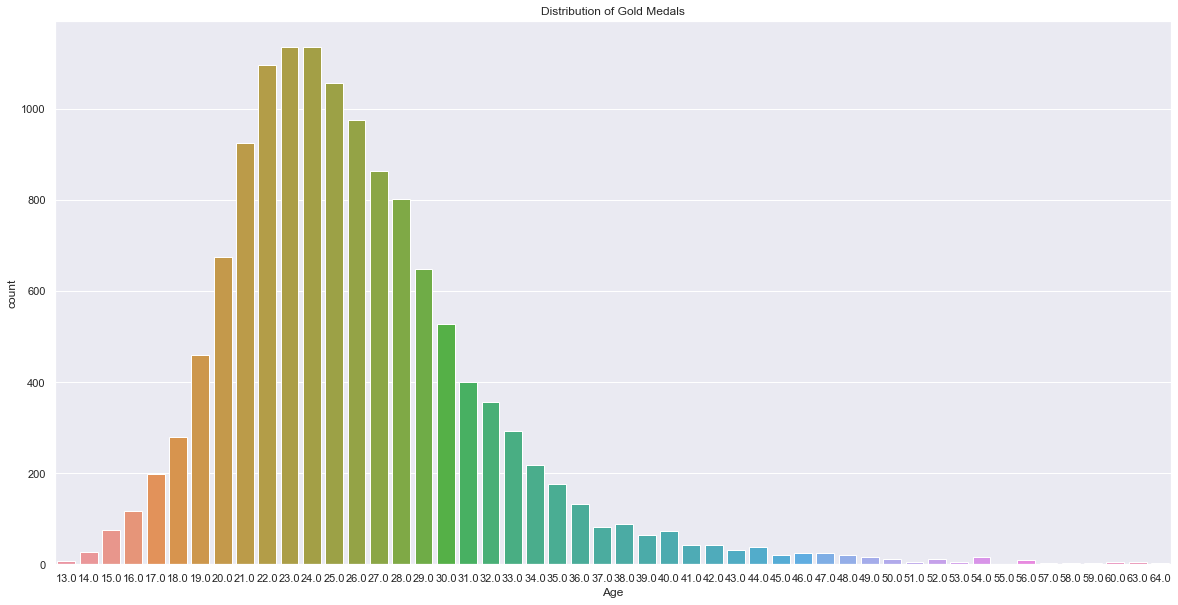

In [390]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
#This module provides routines to adjust subplot params so that subplots are nicely fit in the figure
sns.countplot(goldMedals['Age'])
#Bar graphs are useful for displaying relationships between categorical data and at least one numerical variable. seaborn.countplot is a barplot where the 
#dependent variable is the number of instances of each instance of the independent variable
plt.title('Distribution of Gold Medals')

In [281]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

65

In [282]:
goldMedals['ID'][goldMedals['Age'] > 50].head()

5078      2894
7961      4404
13394     7272
13396     7272
24897    13033
Name: ID, dtype: int64

Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

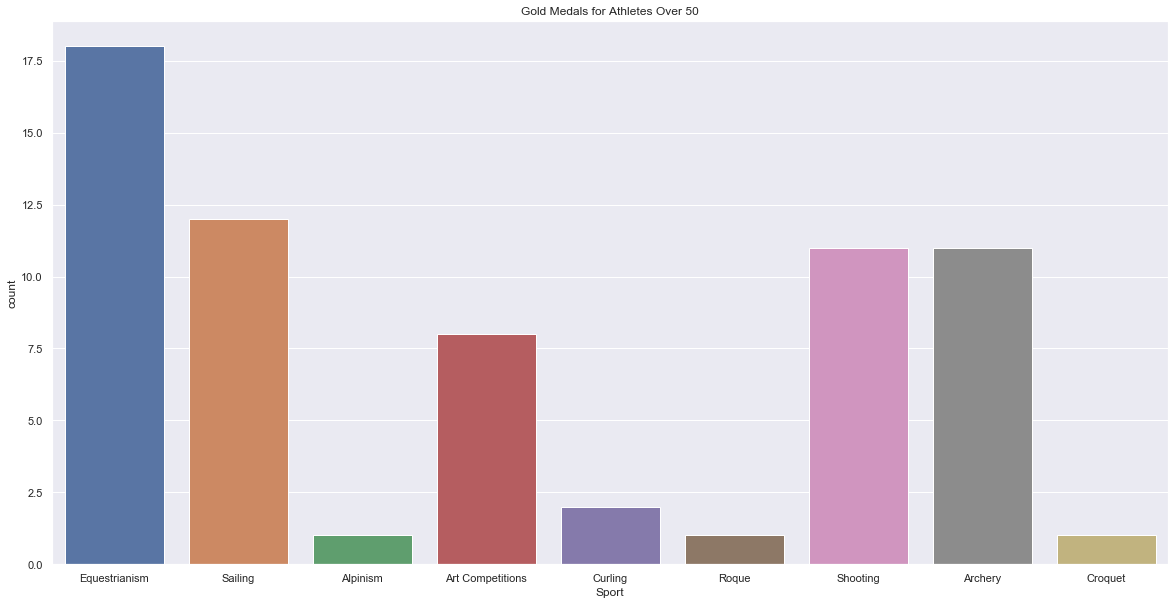

In [284]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 50')

DON'T LOSE HOPE AFTER 50!

GENDER BASED ANALYSIS

In [285]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

Text(0.5, 1.0, 'Variation of Male Athletes over time')

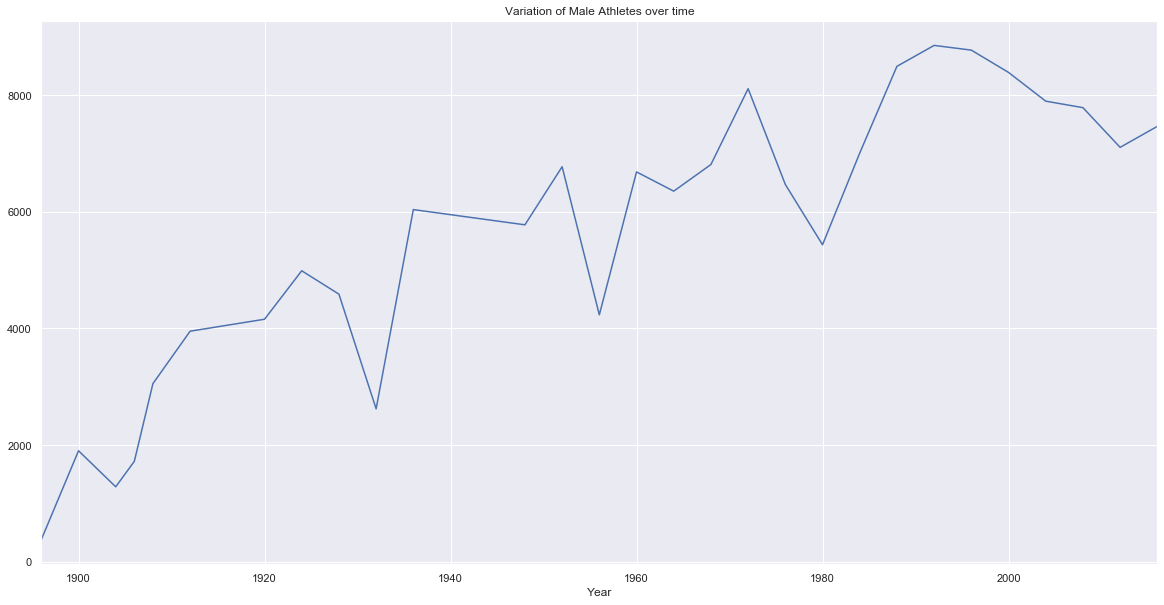

In [286]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

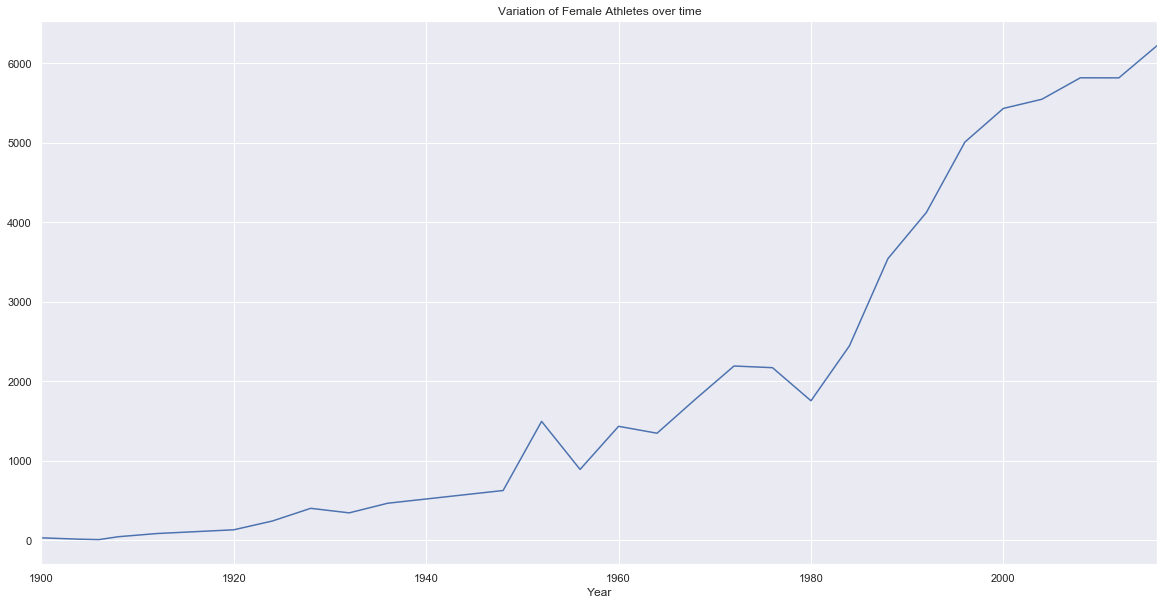

In [287]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

Text(0.5, 1.0, 'Women medals per edition of the Games')

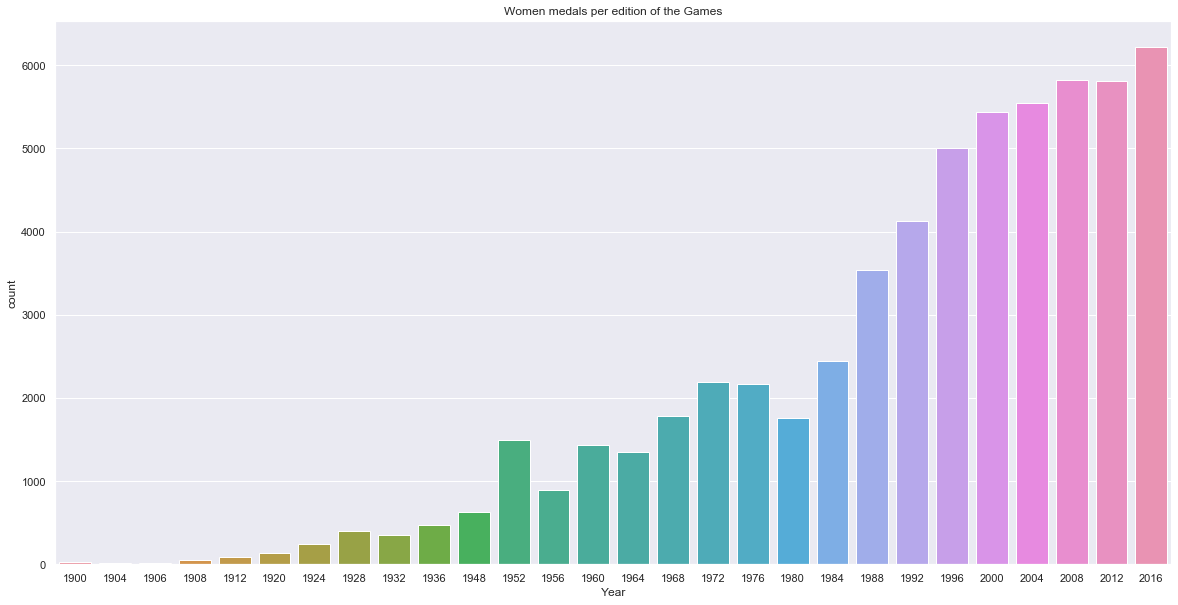

In [288]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

Text(0.5, 1.0, 'Men medals per edition of the Games')

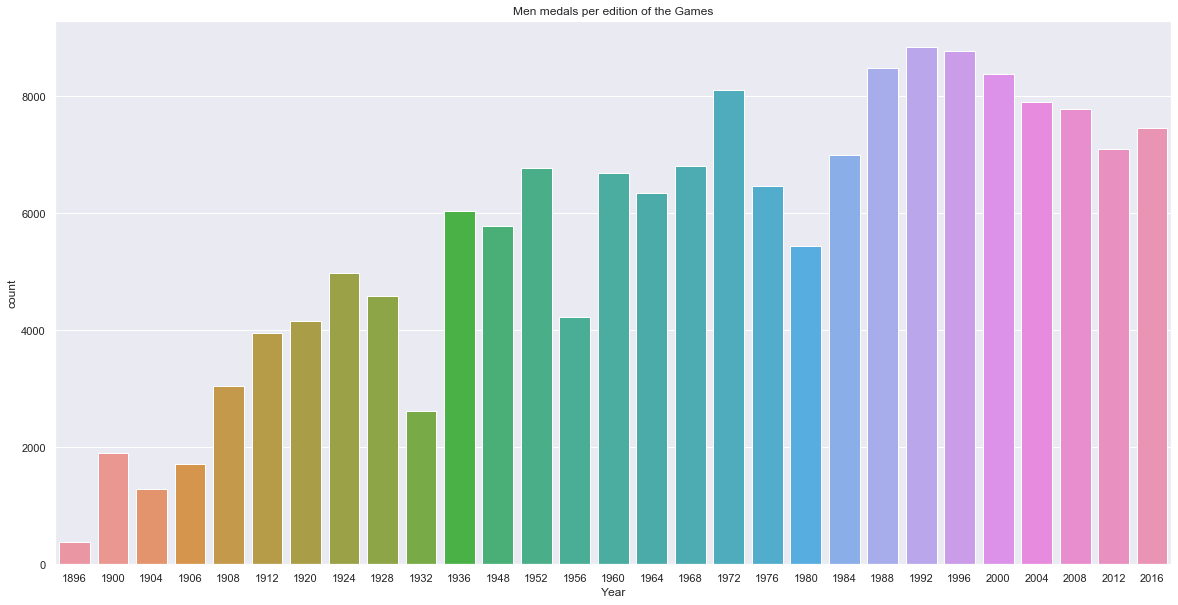

In [289]:
MenInOlympics = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=MenInOlympics)
plt.title('Men medals per edition of the Games')

TRENDS OVER TIME

Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time')

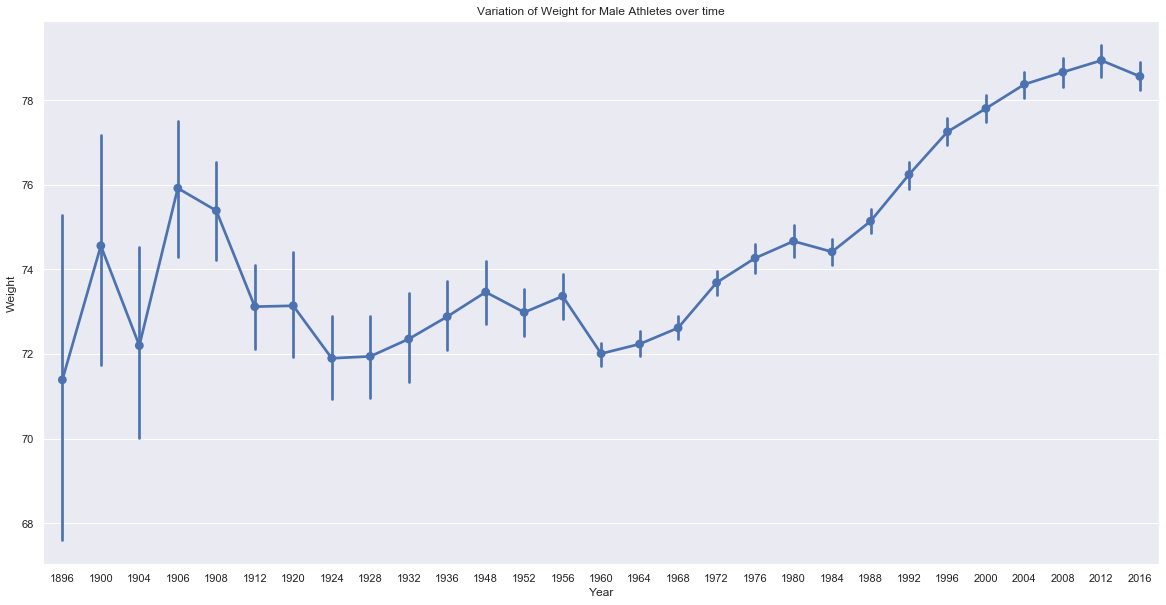

In [290]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=MenOverTime)
plt.title('Variation of Weight for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

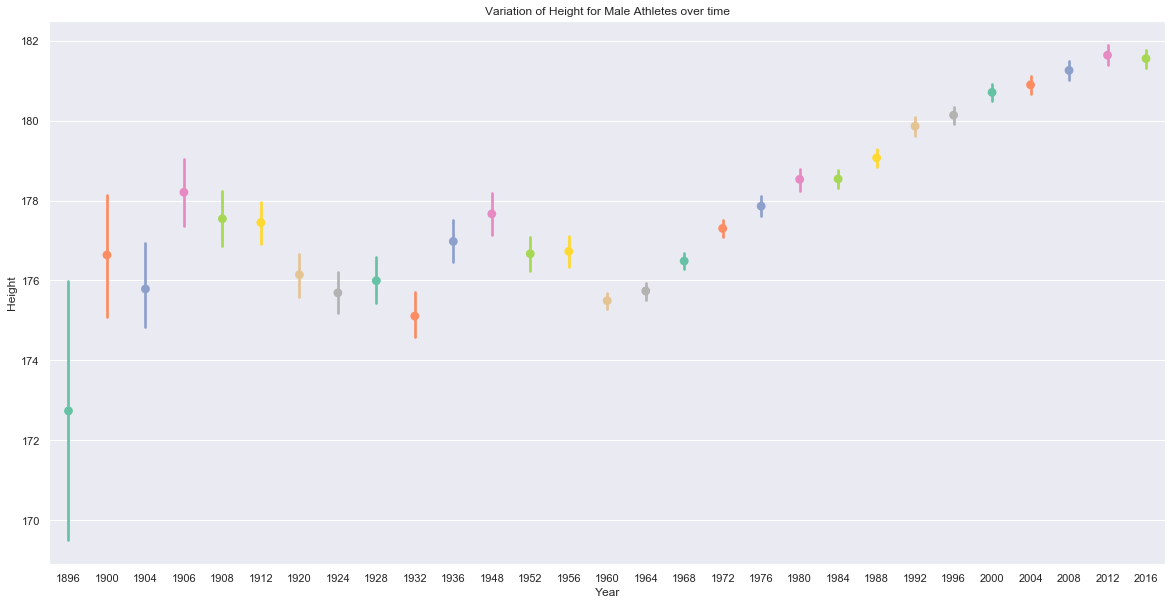

In [291]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=MenOverTime, palette='Set2')
plt.title('Variation of Height for Male Athletes over time')

NORMALIZATION

The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly.

function to scale input vectors individually to unit norm (vector length).

In [292]:
from sklearn import preprocessing as pre

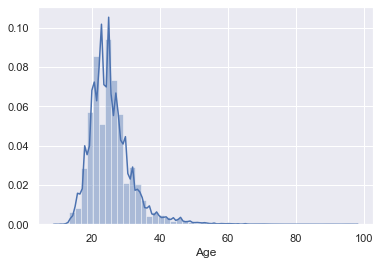

In [293]:
sns.distplot(data["Age"])

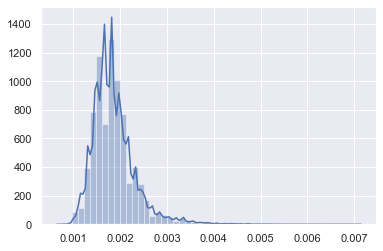

In [294]:
#from sklearn import preprocessing as pre
x_array = np.array(data['Age'])
normalized_X  = pre.normalize([x_array])
sns.distplot(normalized_X)

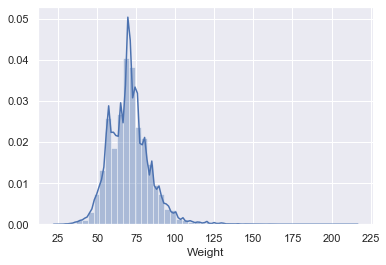

In [295]:
sns.distplot(data["Weight"])

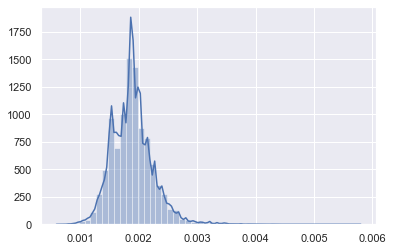

In [296]:
#from sklearn import preprocessing as pre
x_array = np.array(data['Weight'])
normalized_X  = pre.normalize([x_array])
sns.distplot(normalized_X)

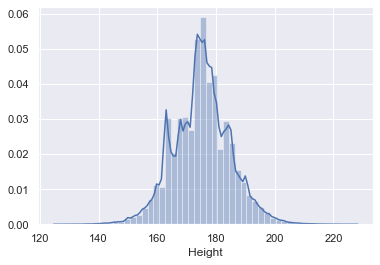

In [297]:
sns.distplot(data["Height"])

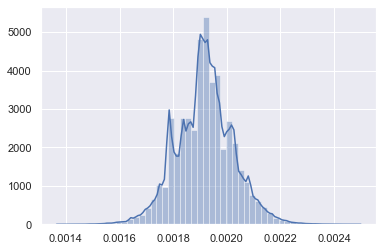

In [298]:
#from sklearn import preprocessing as pre
x_array = np.array(data['Height'])
normalized_X  = pre.normalize([x_array])
sns.distplot(normalized_X)

HYPOTHESIS TESTING

In [299]:
import statsmodels.api as sm

In [300]:
data = pd.read_csv('Desktop/athlete_events.csv')
regions = pd.read_csv('Desktop/noc_regions.csv')

Research Question:

Is there a significant difference between the population proportions of the participants from Great Britain and the participants from Italy who won medals?

Poplulation:
    All participants from Great Britain and Italy

Parameter of interest: p1-p2;
    p1 - Great Britain;
    p2 - Italy

Null Hypothesis: p1 - p2 = 0
Alternative Hypthosis: p1 - p2  != 0

In [355]:
GB = data[data.Team == "Great Britain"]
IT = data[data.Team == "Italy"]

In [356]:
IT.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.000000,90.00000,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
197,91,Emanuele Abate,M,27.0,190.000000,80.00000,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,DNW
198,92,Ignazio Abate,M,21.0,180.000000,73.00000,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,DNW
214,103,Silvano Abba,M,25.0,177.944316,70.27954,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,Agostino Abbagnale,M,22.0,188.000000,96.00000,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [346]:
gbn = GB['Medal'].value_counts()[1] + GB['Medal'].value_counts()[2] + GB['Medal'].value_counts()[3]

In [347]:

itn = IT['Medal'].value_counts()[1] + IT['Medal'].value_counts()[2] + IT['Medal'].value_counts()[3]

In [349]:
perGB = (gbn/len(GB))
perIT = (itn/len(IT))

In [368]:
n1 = 2000
p1 = perGB

n2 = 2000
p2 = perIT
#Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where 
#n an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)


In [369]:
sm.stats.ttest_ind(population1, population2)

(0.7235779513902708, 0.4693672139582684, 3998.0)

CONCLUSION: Since the p-value is quite high, we cannot reject the Null hypothesis in this case i.e. the difference in the population proportions are not statistically significant.
Therefore, it is very plausible that the population proportions of the participants from Great Britain and the participants from Italy who won Gold medals are equal.